In [3]:
from signal_utils import *

np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT1.txt", LUT1.astype(int), fmt="%d", delimiter=" ")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT2.txt", LUT2.astype(int), fmt="%d", delimiter=" ")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT3.txt", LUT3.astype(int), fmt="%d", delimiter=" ")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT4.txt", LUT4.astype(int), fmt="%d", delimiter=" ")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/LUT5.txt", LUT5.astype(int), fmt="%d", delimiter=" ")

# Complex Signal

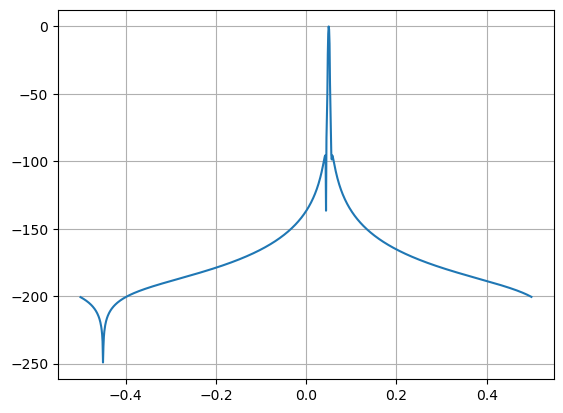

In [178]:
N = 2**10
n = np.arange(N)
F = 0.05
AdB = 100
perc = 0.15
Fmax = 0.5 * (1 - perc)

xi_test = (1 - 2**-11)*np.cos(2*np.pi*F*n)
xq_test = (1 - 2**-11)*np.sin(2*np.pi*F*n)
xiq_test = xi_test + 1j*xq_test

freqs_test, xfftdB_test, an_ = fftdB(xiq_test, True)
plt.figure()
plt.plot(freqs_test, xfftdB_test)
plt.grid()
plt.show()

In [179]:
np.savetxt("../../../../VHDL/data/rfTransmitter_test/xin_i_test.txt", xi_test, fmt="%.12f")
np.savetxt("../../../../VHDL/data/rfTransmitter_test/xin_q_test.txt", xq_test, fmt="%.12f")

28.346020761245676


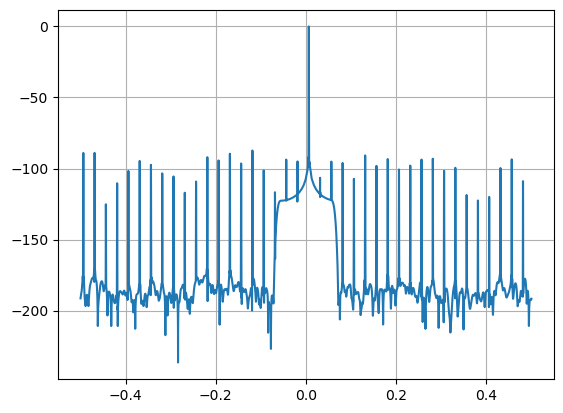

In [247]:
xout_i_osr8_test = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_i_sor8_test.txt", dtype=np.int32)[:-7]
xout_q_osr8_test = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_q_sor8_test.txt", dtype=np.int32)[:-7]
xout_iq_osr8_test = xout_i_osr8_test + 1j*xout_q_osr8_test

print(4 / (np.max(xout_i_osr8_test)*2**-15))

freq_out_stage1, xfftdB_out_stage1, an = fftdB(xout_iq_osr8_test, True)
plt.figure()
plt.plot(freq_out_stage1, xfftdB_out_stage1)
plt.grid()

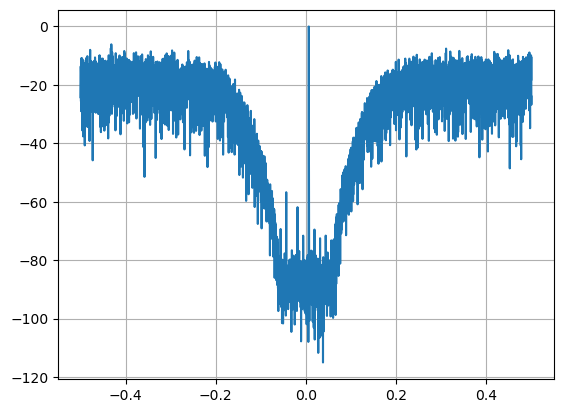

In [248]:
xout_i_stage1 = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_i_stage1.txt", dtype=np.int32)[:-7]
xout_q_stage1 = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_q_stage1.txt", dtype=np.int32)[:-7]
xout_iq_stage1 = xout_i_stage1 + 1j*xout_q_stage1

freq_out_stage1, xfftdB_out_stage1, an = fftdB(xout_iq_stage1, True)
plt.figure()
plt.plot(freq_out_stage1, xfftdB_out_stage1)
plt.grid()

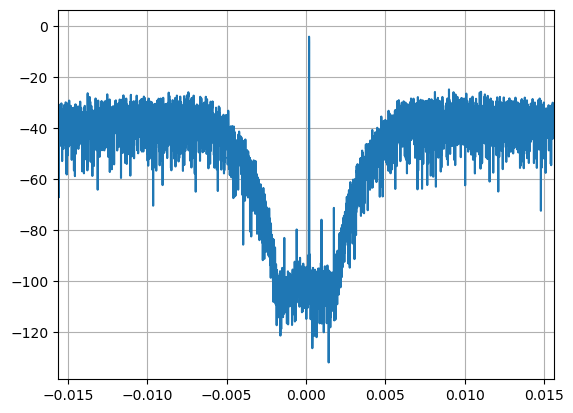

In [226]:
xout_i_stage2 = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_i_stage2.txt", dtype=np.int32)
xout_q_stage2 = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_q_stage2.txt", dtype=np.int32)
xout_i_stage2 = np.where(xout_i_stage2 == 0, -1, 1)
xout_q_stage2 = np.where(xout_q_stage2 == 0, -1, 1)
xout_iq_stage2 = xout_i_stage2 + 1j*xout_q_stage2

freq_out_stage2, xfftdB_out_stage2, an = fftdB(xout_iq_stage2, True)
plt.figure()
plt.plot(freq_out_stage2, xfftdB_out_stage2)
plt.xlim([-0.5/32, 0.5/32])
plt.grid()

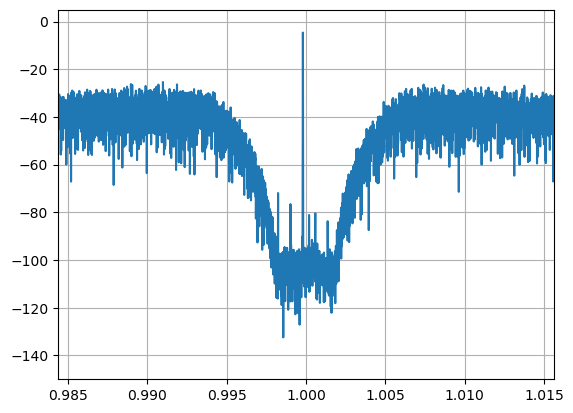

In [227]:
xout_stage3 = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_stage3.txt", dtype=np.int32)
xout_stage3 = np.where(xout_stage3 == 0, -1, 1)

freq_out_stage3, xfftdB_out_stage3, an = fftdB(xout_stage3, True)
freq_out_stage3 *= 4
plt.figure()
plt.plot(freq_out_stage3, xfftdB_out_stage3)
plt.xlim([1-0.5/32, 1+0.5/32])
plt.ylim([-150, 5])
# plt.xlim([0.9, 1])
plt.grid()

In [72]:
print(len(xout_stage3))
print(len(xout_i_stage2)*4)

4543889
4194360


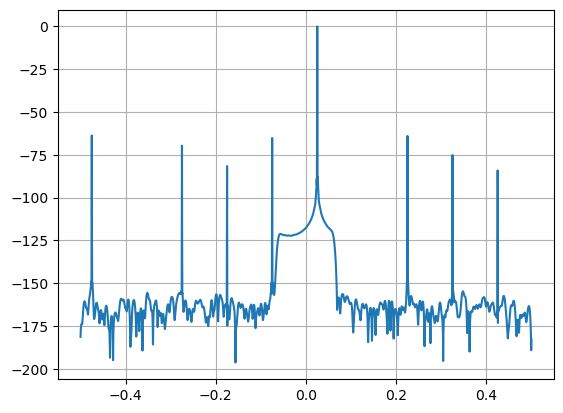

In [144]:
xout_i_stage1 = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_i_sor8_test.txt", dtype=np.int32)[:-7]
xout_q_stage1 = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_q_sor8_test.txt", dtype=np.int32)[:-7]
xout_iq_stage1 = xout_i_stage1 + 1j*xout_q_stage1

freq_out_stage1, xfftdB_out_stage1, an = fftdB(xout_iq_stage1, True)
plt.figure()
plt.plot(freq_out_stage1, xfftdB_out_stage1)
plt.grid()

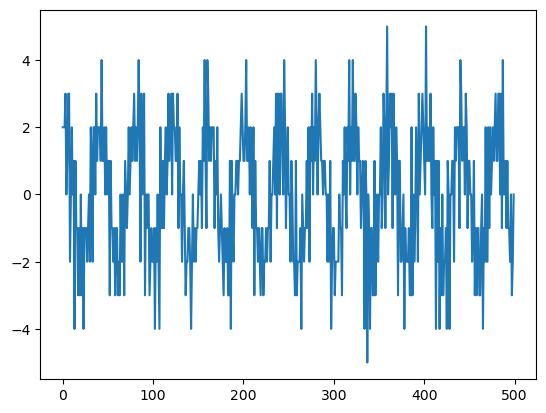

In [54]:
plt.figure()
plt.plot(xout_i_stage1[1500:2000])

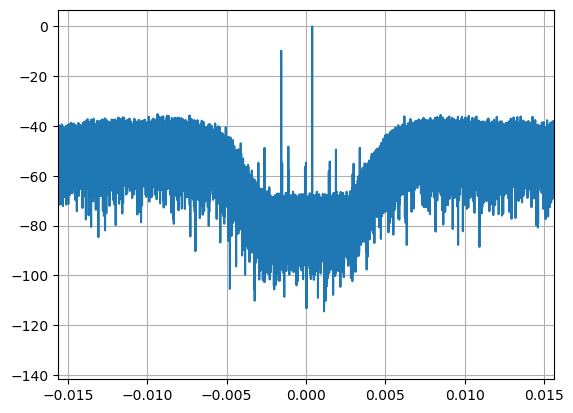

In [23]:
xout_i_test = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_i_test.txt", dtype=np.int32)
xout_q_test = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_q_test.txt", dtype=np.int32)
xout_i_test = np.where(xout_i_test == 0, -1, 1)
xout_q_test = np.where(xout_q_test == 0, -1, 1)
xout_iq_test = xout_i_test + 1j*xout_q_test

freq_out_test, xfftdB_out_test, an = fftdB(xout_iq_test, True)
plt.figure()
plt.plot(freq_out_test, xfftdB_out_test)
plt.xlim([-0.5/32, 0.5/32])
# plt.plot([Fmax/8, Fmax/8], [-200, 5], "--r")
# plt.plot([-Fmax/8, -Fmax/8], [-200, 5], "--r")
# plt.plot([-0.5, 0.5], [-AdB, -AdB], "--r")
plt.grid()

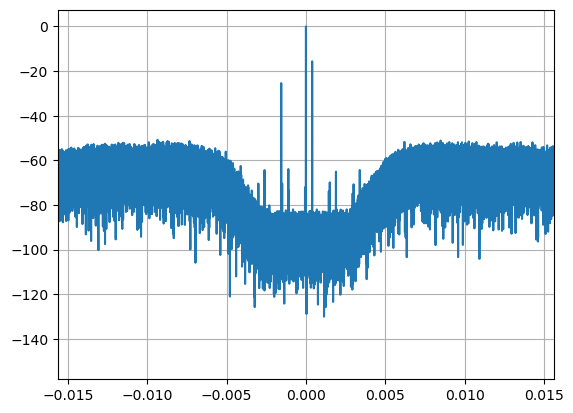

In [24]:
xout_i_test = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_i_test.txt", dtype=np.int32)
xout_q_test = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_q_test.txt", dtype=np.int32)

xout_iq_test = xout_i_test + 1j*xout_q_test

freq_out_test, xfftdB_out_test, an = fftdB(xout_iq_test, True)
plt.figure()
plt.xlim([-0.5/32, 0.5/32])
plt.plot(freq_out_test, xfftdB_out_test)
plt.grid()

In [146]:
xout_i_stage1 = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_i_sor8_test.txt", dtype=np.int32)
xout_q_stage1 = np.loadtxt("../../../../VHDL/data/rfTransmitter_test/xout_q_sor8_test.txt", dtype=np.int32)
print(np.max(xout_i_stage1))

266


In [147]:
30/4


7.5